In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils, plots
import arviz as az

### Model 1

In [5]:
# Directory of pickle file
pickelDir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/Model_secondOrder/hier/groups/hierRL_HC_PD_Model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']

In [15]:
az.summary(fit)[0:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
hier_alphaAct_mu,-0.732,0.187,-1.083,-0.376,0.003,0.002,3097.0,4630.0,1.0
hier_alphaClr_mu,-0.116,0.170,-0.425,0.219,0.002,0.002,4712.0,6223.0,1.0
hier_weightAct_mu,0.294,0.116,0.086,0.524,0.002,0.001,4607.0,6093.0,1.0
hier_sensitivity_mu,-3.446,0.105,-3.646,-3.247,0.002,0.002,1848.0,2583.0,1.0
hier_alphaAct_sd,1.065,0.181,0.756,1.411,0.003,0.002,4774.0,6545.0,1.0


In [8]:
log_lik = fit['log_lik']
utils.waic(log_likelihood=log_lik)

{'lppd': -5142.838429062571,
 'p_waic': 1647.0861848402465,
 'waic': 13579.849227805635,
 'waic_se': 0.8494036646336353}

### Model 2

In [2]:
# Directory of pickle file
pickelDir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/Model_secondOrder/hier/groups/hierRL_HC_PD_Model2.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']

In [3]:
az.summary(fit)[0:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
hier_alphaAct_mu[0],-0.714,0.240,-1.143,-0.243,0.005,0.003,2429.0,4071.0,1.0
hier_alphaAct_mu[1],-0.738,0.294,-1.306,-0.191,0.006,0.004,2304.0,3742.0,1.0
hier_alphaClr_mu[0],-0.199,0.211,-0.597,0.209,0.003,0.002,4134.0,5290.0,1.0
hier_alphaClr_mu[1],-0.013,0.293,-0.558,0.538,0.006,0.004,2622.0,3654.0,1.0
hier_weightAct_mu[0],0.319,0.178,-0.015,0.659,0.003,0.002,2857.0,4036.0,1.0


In [4]:
log_lik = fit['log_lik']
utils.waic(log_likelihood=log_lik)

{'lppd': -4115.864341061391,
 'p_waic': 1316.0885350581862,
 'waic': 10863.905752239156,
 'waic_se': 0.7722985227402657}

### Model 3

In [4]:
# Directory of pickle file
pickelDir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/Model_secondOrder/hier/groups/cond_patient/hierRL_HC_PD_cond_group_Model3.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']

In [3]:
az.summary(fit)[0:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
hier_alphaAct_mu[0],-0.679,0.209,-1.073,-0.285,0.006,0.004,1413.0,2317.0,1.0
hier_alphaAct_mu[1],-0.667,0.268,-1.179,-0.168,0.007,0.005,1481.0,2702.0,1.0
hier_alphaClr_mu[0],-0.420,0.162,-0.726,-0.113,0.004,0.003,2093.0,3494.0,1.0
hier_alphaClr_mu[1],-0.180,0.202,-0.552,0.205,0.005,0.003,1761.0,3601.0,1.0
"hier_weightAct_mu[0, 0]",2.867,0.527,1.908,3.867,0.007,0.005,5647.0,5245.0,1.0


In [3]:
log_lik = fit['log_lik']
utils.waic(log_likelihood=log_lik)

{'lppd': -3743.8046849664597,
 'p_waic': 1637.5145480620265,
 'waic': 10762.638466056973,
 'waic_se': 0.9076300964538071}

In [9]:
fit['hier_alphaAct_mu'].shape

(2, 2, 25000)

In [ ]:
sns.displot(fit['hier_sensitivity_sd'][0])

(0.0, 1.0)

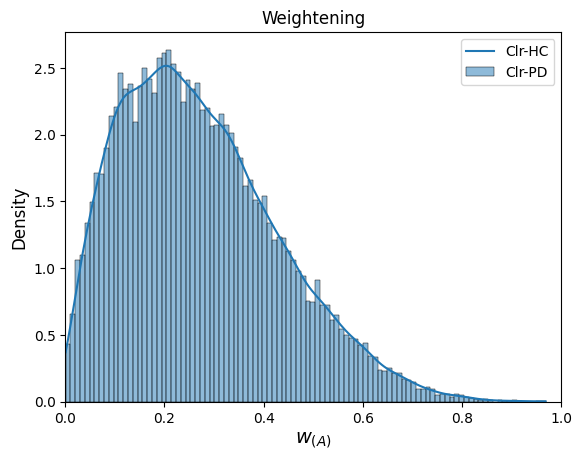

: 

In [10]:
# Weghtening
sns.histplot(fit['transfer_weightAct'][10, 1, 1, :], kde=True, stat='density', bins=100)
plt.legend(['Clr-HC', 'Clr-PD'])
plt.title('Weightening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.xlim(0, 1)

### Model 4

In [2]:
# Directory of pickle file
pickelDir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/Model_secondOrder/hier/groups/hierRL_HC_PD_Model4.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']

In [39]:
log_lik = fit['log_lik']
utils.waic(log_likelihood=log_lik)

{'lppd': -3713.280860523602,
 'p_waic': 1641.4050146273614,
 'waic': 10709.371750301927,
 'waic_se': 0.8902399236434352}

In [ ]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_ = fit["transfer_hier_alphaAct_mu"] 
alphaClr_ = fit["transfer_hier_alphaClr_mu"] 
weightAct_ = fit["transfer_hier_weightAct_mu"] 
beta_ = fit["transfer_hier_sensitivity_mu"]  
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weightAct_[0, 0], kde=True, stat='density', bins=100)
sns.histplot(weightAct_[1, 0], kde=True, stat='density', bins=100)
plt.legend(['Act-HC', 'Act-PD'])
plt.title('Weightening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.xlim(.9, 1)


In [53]:
beta_[0].shape

(2, 8000)